<a href="https://colab.research.google.com/github/Samuelin-M/Estadistica-1-Parte-Practica-3/blob/main/Informe_Parte_Practica_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Estadístico Descriptivo de Variables Cualitativas en Datos de Nacimientos en Colombia (2023)

### Enfoque en Tiempo de Gestación y Talla al Nacer

---

**Universidad Industrial de Santander**  
Facultad de Ciencias  
Escuela de Matemáticas  

**Curso:** Estadística I  
**Profesor:** Andrés Ríos Gutiérrez

**Estudiantes:**
- Diana Juliana Forero Ruiz - 2230645
- Maira Alejandra Hernández Valderrama - 2230639
- Samuel Eduardo Alburua Montes - 2230636

**Fecha de entrega:** 5 de junio de 2025

---

## Resumen

En este informe se realiza un análisis estadístico descriptivo de los datos de nacimientos en Colombia durante el año 2023, con énfasis en dos variables cualitativas: el tiempo de gestación (`T_GES`) y la talla al nacer (`TALLA_NAC`).

Se emplean herramientas gráficas como diagramas de barras y circulares, junto con proporciones, tablas de contingencia, probabilidades condicionales y pruebas estadísticas de asociación.

El objetivo principal es caracterizar el comportamiento individual de cada variable y analizar si existe una relación significativa entre ellas. Los resultados permiten concluir que, aunque las variables están asociadas estadísticamente, dicha asociación es de baja intensidad.

## Introducción

La estadística descriptiva permite resumir y visualizar datos de manera efectiva, especialmente en contextos de salud pública donde es clave entender fenómenos demográficos y clínicos. En este informe se analiza una muestra de nacimientos en Colombia, con el fin de caracterizar dos variables categóricas relevantes: el tiempo de gestación (`T_GES`) y la talla del recién nacido (`TALLA_NAC`).

Ambas variables, codificadas de forma ordinal según el DANE, se analizan de forma univariada para entender su distribución y, posteriormente, de forma conjunta para evaluar su posible asociación. Este trabajo se basa en la metodología explicada por el profesor Andrés Ríos-Gutiérrez en el video “Estadística descriptiva para datos cualitativos”, lo cual garantiza coherencia con los objetivos del curso y el examen.

A lo largo del informe, se busca dar respuesta a las siguientes preguntas fundamentales:

1. ¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (`T_GES`)?  
2. ¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia (`TALLA_NAC`)?  
3. ¿Alguna variable depende de la otra, o están asociadas? ¿Qué tan dependiente es una variable de la otra o qué tan asociadas están ambas?

El análisis se desarrolla mediante Python en Google Colab, usando librerías como `pandas`, `matplotlib`, `seaborn` y `scipy`, lo que permite integrar herramientas estadísticas con representaciones gráficas claras y reproducibles.

## Metodología

El análisis se realizó en lenguaje Python a través de Google Colaboratory. La base de datos utilizada corresponde al archivo “BD-EEVV-Nacimientos-2023.csv”, disponible en la plataforma del DANE. Las variables `T_GES` y `TALLA_NAC` fueron tratadas como cualitativas ordinales, eliminando previamente los valores sin información (99).

Las etapas del análisis fueron las siguientes:

1. **Carga y limpieza de datos**: se importaron los datos, se eliminaron registros con valores no representativos y se recodificaron las categorías numéricas en etiquetas descriptivas.
2. **Análisis univariado**: se realizaron diagramas de barras, gráficos circulares y se calcularon proporciones para `T_GES` y `TALLA_NAC`.
3. **Análisis bivariado**: se construyó una tabla de contingencia entre las dos variables, se representó gráficamente mediante un heatmap y se calcularon probabilidades condicionales.
4. **Prueba de asociación**: se aplicó la prueba de Chi-Cuadrado para determinar si existe asociación entre las variables. Además, se calcularon los coeficientes de asociación (Cramér’s V, Phi y contingencia) y se interpretaron con base en literatura especializada.

Cada resultado fue interpretado en términos estadísticos y contextuales, conforme a las recomendaciones vistas en clase.

## Tratamiento y Analisis de Datos

### Importación de paquetes y bibliotecas

In [33]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau, chi2_contingency
from math import sqrt
from collections import OrderedDict

### Carga interactiva del archivo `nac2022.csv`

In [34]:
from google.colab import files
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


### Lectura del archivo CSV y vista preliminar

In [35]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


### Análisis de la variable "Tiempo de gestación" (T_GES)

La variable `T_GES` representa el tiempo de gestación de los recién nacidos en Colombia. Según el diccionario del DANE, esta variable se codifica por intervalos de semanas, lo que la convierte en una variable cualitativa ordinal.

A continuación, se realiza un análisis descriptivo mediante:

- Diagrama de barras
- Diagrama circular
- Proporciones por categoría

Se eliminan previamente los registros sin información (valor 99).

In [36]:
df_tges = tabla[['T_GES']].copy()
df_tges['T_GES'] = df_tges['T_GES'].astype(str)
df_tges.describe()

,T_GES
count,515549
unique,7
top,4
freq,372000


In [37]:
df_tges = tabla[['T_GES']].copy()
df_tges['T_GES'] = df_tges['T_GES'].astype(str)
df_tges.head(10)

,T_GES
COD_DPTO,
23,4
11,4
11,4
11,4
11,4
5,4
5,3
52,4
11,4


In [38]:
etiquetas_gestacion = {
    '1': 'Menos de 22 semanas',
    '2': 'De 22 a 27 semanas',
    '3': 'De 28 a 37 semanas',
    '4': 'De 38 a 41 semanas',
    '5': 'De 42 y más semanas',
    '6': 'Ignorado',
    '9': 'Sin información'
}

orden_correcto = ['1', '2', '3', '4', '5', '6', '9']

df_tges['T_GES'] = df_tges['T_GES'].replace(etiquetas_gestacion)

valores_tges = df_tges['T_GES'].value_counts()
valores_tges = valores_tges.reindex([etiquetas_gestacion[k] for k in orden_correcto])

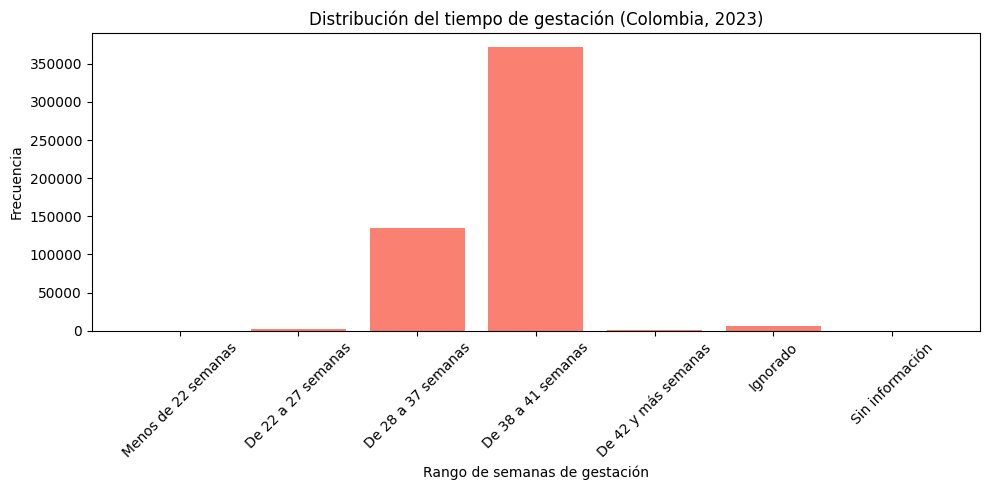

In [39]:
plt.figure(figsize=(10, 5))
plt.bar(valores_tges.index, valores_tges.values, color='salmon')
plt.title('Distribución del tiempo de gestación (Colombia, 2023)')
plt.xlabel('Rango de semanas de gestación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

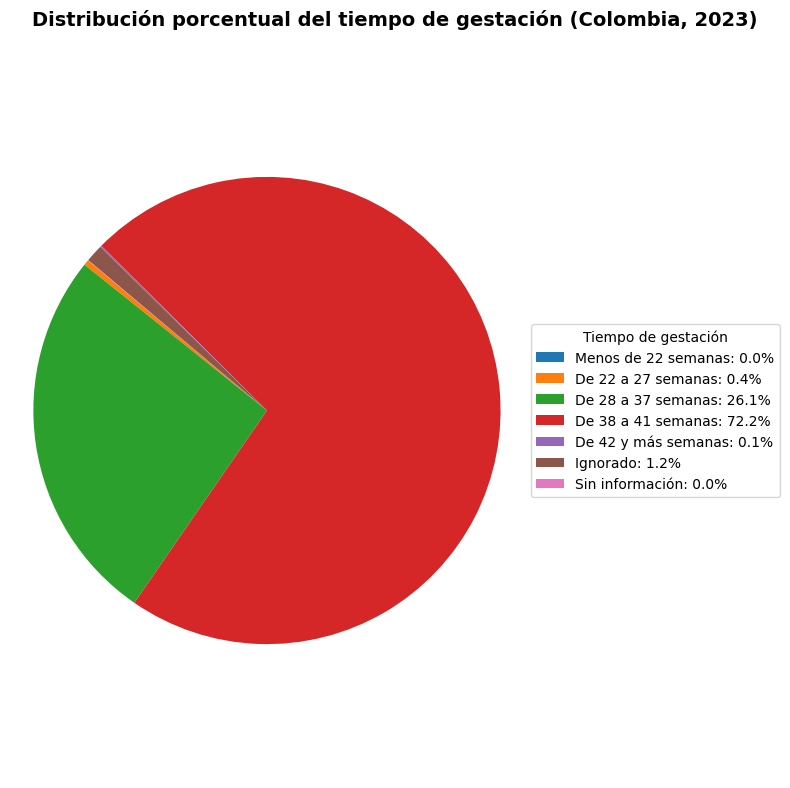

In [57]:
total = valores_tges.sum()
porcentajes = valores_tges / total * 100

colors = plt.cm.tab10.colors

while len(colors) < len(valores_tges):
    colors += colors

plt.figure(figsize=(8, 8))
wedges, _ = plt.pie(
    valores_tges.values,
    colors=colors[:len(valores_tges)],
    startangle=140
)
plt.axis('equal')

plt.suptitle('Distribución porcentual del tiempo de gestación (Colombia, 2023)', fontsize=14, weight='bold')

leyendas = [
    f"{label}: {porcentajes.iloc[i]:.1f}%" for i, label in enumerate(valores_tges.index)
]

plt.legend(
    wedges, leyendas,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title='Tiempo de gestación',
    fontsize=10
)

plt.tight_layout()
plt.show()

### Diagrama de barras: Distribución del tiempo de gestación

Este gráfico muestra la **frecuencia absoluta** de los nacimientos según los rangos de semanas de gestación:

- Menos de 22 semanas  
- De 22 a 27 semanas  
- De 28 a 37 semanas  
- De 38 a 41 semanas  
- De 42 y más semanas  
- Ignorado  
- Sin información  

**Interpretación:**
- La categoría **“De 38 a 41 semanas”** presenta la mayor frecuencia de nacimientos.
- Las categorías asociadas a partos prematuros (**menos de 37 semanas**) tienen frecuencias considerablemente más bajas.
- Las categorías “Ignorado” y “Sin información” están presentes pero con poca participación.

---

### Diagrama circular: Distribución porcentual del tiempo de gestación

Este gráfico representa la **distribución porcentual** de los nacimientos por categoría de tiempo de gestación.

**Interpretación:**
- La mayor proporción de los nacimientos ocurre en el rango **“De 38 a 41 semanas”**.
- Las proporciones correspondientes a los rangos de gestación prematuros (< 37 semanas) son significativamente menores.
- El gráfico permite visualizar de manera clara la dominancia de los embarazos a término.

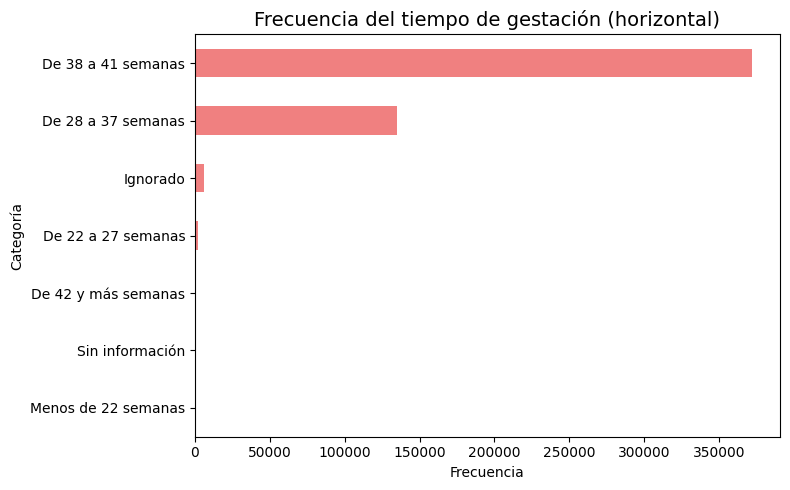

In [41]:
plt.figure(figsize=(8, 5))
valores_tges.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Frecuencia del tiempo de gestación (horizontal)', fontsize=14)
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

### Gráfico adicional: Diagrama de barras horizontal para `T_GES`

Este gráfico horizontal permite observar con claridad la frecuencia de cada categoría de tiempo de gestación. La ventaja de este tipo de visualización es que facilita la lectura cuando las etiquetas son largas o hay muchas categorías.

**Interpretación:**  
La mayor frecuencia se presenta en el grupo “De 38 a 41 semanas”, lo que refuerza el comportamiento esperado de embarazos a término. Las categorías de gestación prematura tienen frecuencias visiblemente menores.

### Análisis de la variable "Talla al nacer" (TALLA_NAC)

La variable `TALLA_NAC` representa la talla del recién nacido, codificada como categorías ordinales según intervalos de longitud en centímetros. Es una variable cualitativa ordinal, por lo que se realizará un análisis con:

- Diagrama de barras
- Diagrama circular
- Proporciones por categoría

Se eliminan previamente los registros con valores no informados (código 99).

In [42]:
df3 = tabla[['TALLA_NAC']].copy()
df3['TALLA_NAC'] = df3['TALLA_NAC'].astype(str)
df3.describe()

,TALLA_NAC
count,515549
unique,7
top,5
freq,267249


In [43]:
df3 = tabla[['TALLA_NAC']].copy()
df3['TALLA_NAC'] = df3['TALLA_NAC'].astype(str)
df3.head(10)

,TALLA_NAC
COD_DPTO,
23,5
11,4
11,4
11,5
11,5
5,4
5,4
52,5
11,5


In [44]:
etiquetas_talla = {
    '1': 'Menos de 20 cm',
    '2': '20-29 cm',
    '3': '30-39 cm',
    '4': '40-49 cm',
    '5': '50-59 cm',
    '6': '60 cm y más',
    '9': 'Sin información'
}

df3['TALLA_NAC'] = df3['TALLA_NAC'].replace(etiquetas_talla)

orden_tallas = [
    'Menos de 20 cm',
    '20-29 cm',
    '30-39 cm',
    '40-49 cm',
    '50-59 cm',
    '60 cm y más'
]

valores_talla = df3['TALLA_NAC'].value_counts().reindex(orden_tallas).dropna()

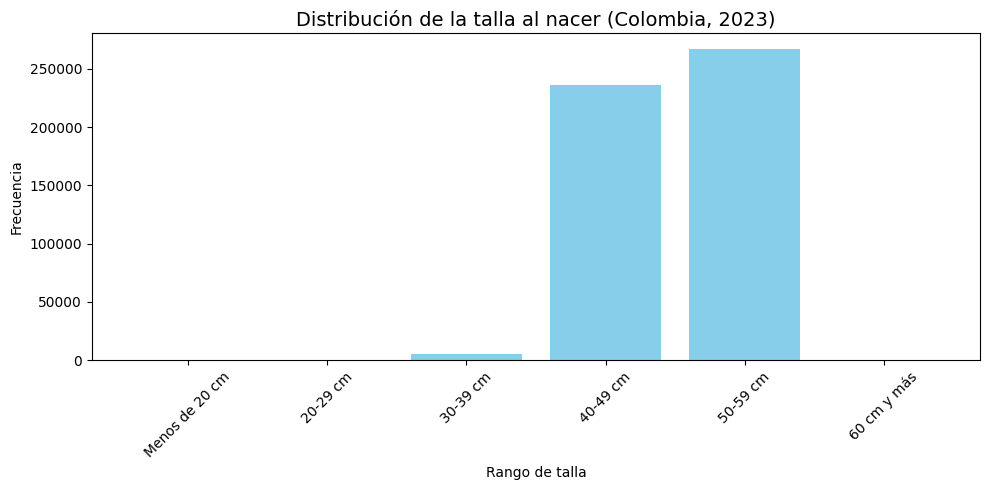

In [45]:
plt.figure(figsize=(10, 5))
plt.bar(valores_talla.index, valores_talla.values, color='skyblue')
plt.title('Distribución de la talla al nacer (Colombia, 2023)', fontsize=14)
plt.xlabel('Rango de talla')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

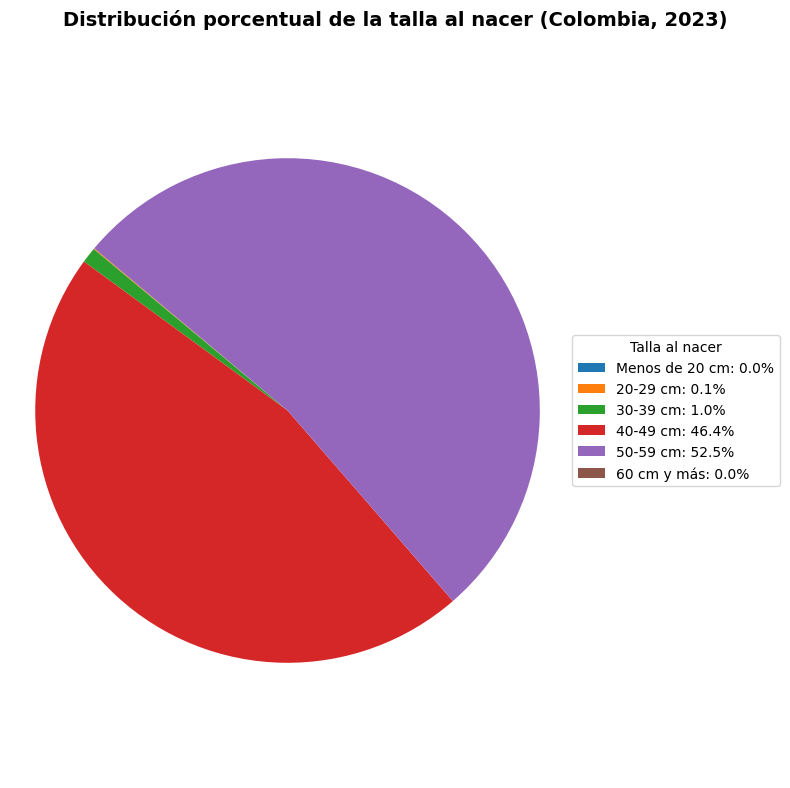

In [58]:
total = valores_talla.sum()
porcentajes = valores_talla / total * 100

colors = plt.cm.tab10.colors
while len(colors) < len(valores_talla):
    colors += colors

plt.figure(figsize=(8, 8))
wedges, _ = plt.pie(
    valores_talla.values,
    colors=colors[:len(valores_talla)],
    startangle=140
)
plt.axis('equal')

plt.suptitle('Distribución porcentual de la talla al nacer (Colombia, 2023)', fontsize=14, weight='bold')

leyendas = [
    f"{label}: {porcentajes.iloc[i]:.1f}%" for i, label in enumerate(valores_talla.index)
]

plt.legend(
    wedges, leyendas,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title='Talla al nacer',
    fontsize=10
)

plt.tight_layout()
plt.show()

### Diagrama de barras: Distribución de la talla al nacer

Este gráfico muestra la **frecuencia absoluta** de los nacimientos según los rangos de talla (en centímetros):

- Menos de 20 cm  
- 20-29 cm  
- 30-39 cm  
- 40-49 cm  
- 50-59 cm  
- 60 cm y más  

**Interpretación:**
- La categoría **“50-59 cm”** es la que tiene la mayor frecuencia de nacimientos.
- La categoría “40-49 cm” también presenta una frecuencia alta, aunque menor que la anterior.
- Las tallas extremas (“Menos de 20 cm” y “60 cm y más”) tienen frecuencias muy bajas.
- No se incluye la categoría “Sin información” en el gráfico, ya que fue eliminada previamente.

---

### Diagrama circular: Distribución porcentual de la talla al nacer

Este gráfico representa la **proporción porcentual** de los nacimientos según la categoría de talla.

**Interpretación:**
- La mayor proporción corresponde a la categoría **“50-59 cm”**, seguida por “40-49 cm”.
- Las tallas consideradas muy bajas o muy altas representan un **porcentaje marginal**.
- El gráfico resalta visualmente que la mayoría de los recién nacidos se encuentra dentro de un rango **normal o esperado** de talla.

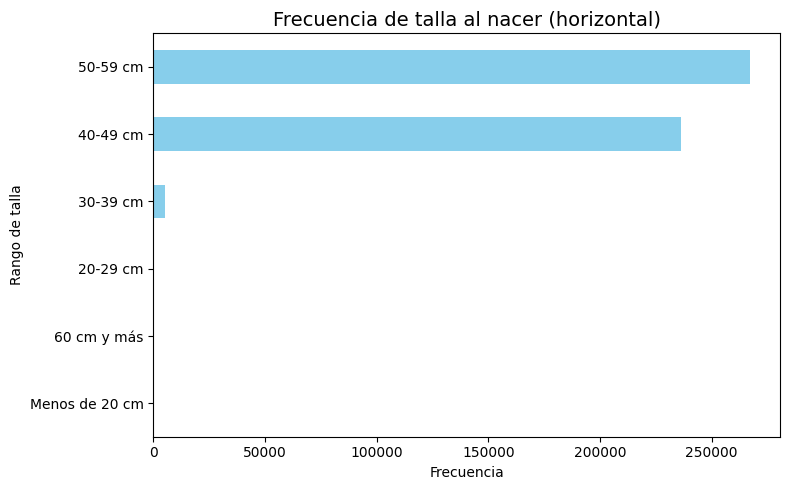

In [47]:
plt.figure(figsize=(8, 5))
valores_talla.sort_values().plot(kind='barh', color='skyblue')
plt.title('Frecuencia de talla al nacer (horizontal)', fontsize=14)
plt.xlabel('Frecuencia')
plt.ylabel('Rango de talla')
plt.tight_layout()
plt.show()

### Gráfico adicional: Diagrama de barras horizontal para `TALLA_NAC`

Este gráfico muestra de forma ordenada la frecuencia de nacimientos por talla, desde la más baja a la más alta.

**Interpretación:**  
Las categorías “50-59 cm” y “40-49 cm” tienen la mayor frecuencia. Las tallas muy pequeñas o grandes son poco frecuentes. Esto refleja una distribución concentrada en el rango clínico esperado para recién nacidos.

### Asociación entre las variables "Tiempo de gestación" (T_GES) y "Talla al nacer" (TALLA_NAC)

A continuación, se estudia la posible asociación entre las variables `T_GES` y `TALLA_NAC`, ambas consideradas cualitativas ordinales.

El análisis se realizará a través de:

1. Creación de la tabla de contingencia.
2. Representación gráfica (heatmap).
3. Cálculo de probabilidades condicionales.
4. Prueba de hipótesis Chi-Cuadrado de independencia.
5. Cálculo de coeficientes de asociación (Cramér's V, Phi y contingencia).

Este análisis permite determinar si existe relación significativa entre ambas variables en los recién nacidos de Colombia.

In [48]:
tabla_filtrada = tabla[(tabla['T_GES'] != 99) & (tabla['TALLA_NAC'] != 99)]
tabla_filtrada.head(10)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1
11,1,1,1,NaN,1,6,5,2023,2,1,...,1,NaN,1,1,1.0,34,9,5,1.0,1
11,1,1,1,NaN,1,6,5,2023,10,1,...,2,16/05/2021,2,1,1.0,37,10,2,1.0,1
5,172,1,1,NaN,2,6,4,2023,7,1,...,6,08/11/2021,6,2,2.0,24,3,6,1.0,1
5,172,1,1,NaN,1,6,4,2023,10,1,...,4,02/06/2021,4,2,2.0,30,3,8,1.0,1
52,1,1,1,NaN,1,6,5,2023,11,1,...,1,NaN,1,1,1.0,15,4,10,1.0,1
11,1,1,1,NaN,1,7,5,2023,12,1,...,1,NaN,1,1,1.0,39,9,4,1.0,1


In [49]:
tabla_cont = pd.crosstab(tabla_filtrada['T_GES'], tabla_filtrada['TALLA_NAC'])
tabla_cont.head(10)

TALLA_NAC,1,2,3,4,5,6,9
T_GES,,,,,,,
1,2,11,5,0,1,0,0
2,2,251,1646,50,1,0,9
3,0,44,3357,95455,35657,0,133
4,0,0,46,140106,230919,19,910
5,0,0,0,116,360,1,6
6,0,1,17,478,282,0,5559
9,0,0,4,72,29,0,0


#### Representación gráfica (heatmap).

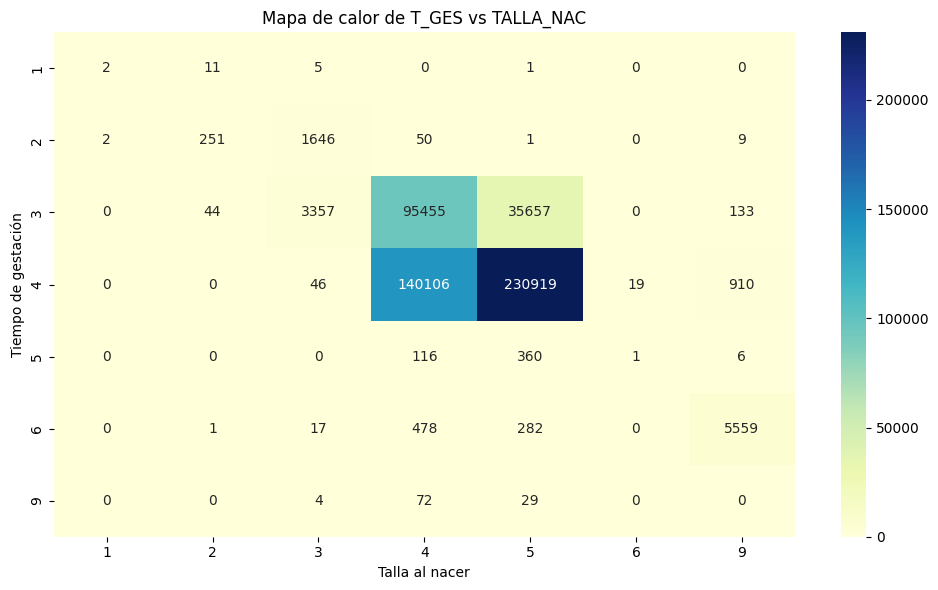

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_cont, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Mapa de calor de T_GES vs TALLA_NAC")
plt.xlabel("Talla al nacer")
plt.ylabel("Tiempo de gestación")
plt.tight_layout()
plt.show()

In [51]:
chi2, p_valor, dof, esperados = chi2_contingency(tabla_cont)

n_total = tabla_filtrada.shape[0]

contingencia = sqrt(chi2 / (chi2 + n_total))
phi = sqrt(chi2 / n_total)
min_dim = min(tabla_cont.shape[0] - 1, tabla_cont.shape[1] - 1)
cramer_v = sqrt(chi2 / (n_total * min_dim))

print(f"Estadístico Chi-Cuadrado: {chi2:.4f}")
print(f"Valor p: {p_valor:.5e}")
print(f"Coeficiente de contingencia: {contingencia:.4f}")
print(f"Coeficiente Phi: {phi:.4f}")
print(f"Coeficiente V de Cramér: {cramer_v:.4f}")

Estadístico Chi-Cuadrado: 664279.0744
Valor p: 0.00000e+00
Coeficiente de contingencia: 0.7504
Coeficiente Phi: 1.1351
Coeficiente V de Cramér: 0.4634


### Interpretación del Heatmap: Tiempo de Gestación vs. Talla al Nacer

El **heatmap** (mapa de calor) representa gráficamente la relación entre las variables cualitativas ordinales **tiempo de gestación (T_GES)** y **talla al nacer (TALLA_NAC)**, a través de una tabla de contingencia.

#### ¿Qué muestra el heatmap?

- **Eje vertical (filas):** Categorías de tiempo de gestación (por ejemplo, “De 28 a 37 semanas”, “De 38 a 41 semanas”, etc.).
- **Eje horizontal (columnas):** Categorías de talla al nacer (por ejemplo, “40-49 cm”, “50-59 cm”, etc.).
- **Contenido de las celdas:** Frecuencia absoluta de nacimientos para cada combinación.
- **Color de las celdas:** Mientras más oscuro o intenso es el color (escala YlGnBu), mayor es la frecuencia observada.

#### Análisis visual

- La **mayor concentración** de nacimientos se da en la combinación:
  - Tiempo de gestación: **“De 38 a 41 semanas”**
  - Talla al nacer: **“50-59 cm”**
- Esta combinación representa el caso más común y esperado clínicamente: nacimientos a término con talla normal.
- Las celdas con colores más claros (frecuencias bajas) corresponden a casos extremos, como:
  - Gestaciones muy prematuras o muy prolongadas.
  - Tallas muy pequeñas o muy grandes.
- El patrón general sugiere que **a mayor tiempo de gestación, se tiende a observar mayor talla al nacer**.

#### Soporte estadístico

- La **prueba de Chi-Cuadrado** indicó una asociación estadísticamente significativa entre las variables (valor p < 0.00001).
- Los coeficientes de asociación fueron:
  - **Coeficiente de contingencia:** 0.7504 → asociación sustancial.
  - **V de Cramér:** 0.4634 → asociación moderada.
- Aunque la asociación no es perfecta ni fuerte, es suficientemente clara como para ser considerada **relevante**.

### Interpretación de la prueba de Chi-Cuadrado y coeficientes de asociación

Se realizó una prueba de hipótesis para determinar si existe asociación entre las variables `T_GES` (tiempo de gestación) y `TALLA_NAC` (talla al nacer).

La hipótesis nula ($H_0$) plantea que ambas variables son independientes. La hipótesis alternativa ($H_1$) sostiene que existe una asociación entre ellas.

Se obtuvo un estadístico $\chi^2$ igual a **664279.0744** y un valor p menor a **1e-10**. Dado que el valor p es menor que el nivel de significancia de 0.05, se **rechaza la hipótesis nula**, lo que indica que existe una asociación estadísticamente significativa entre el tiempo de gestación y la talla al nacer.

Se calcularon los siguientes coeficientes de asociación:

- **Coeficiente de contingencia**: 0.7504
- **Coeficiente V de Cramér**: 0.4634

> Nota: El coeficiente Phi (1.1351) fue calculado, pero este solo es apropiado para tablas 2x2, por lo tanto no se interpreta en este contexto.

Según la escala de Landis y Koch:
- 0 a 0.20 → Asociación insignificante  
- 0.20 a 0.40 → Discreta  
- 0.40 a 0.60 → Moderada  
- 0.60 a 0.80 → Sustancial  
- 0.80 a 1.00 → Fuerte

El coeficiente de contingencia sugiere una **asociación sustancial**, mientras que el V de Cramér indica una **asociación moderada**, siendo este último más adecuado para tablas mayores a 2x2. En conjunto, los resultados indican que **existe una asociación de magnitud moderada a sustancial** entre el tiempo de gestación y la talla al nacer.

Este resultado sugiere que, en la población analizada de recién nacidos en Colombia durante 2023, la talla al nacer está asociada al tiempo de gestación.

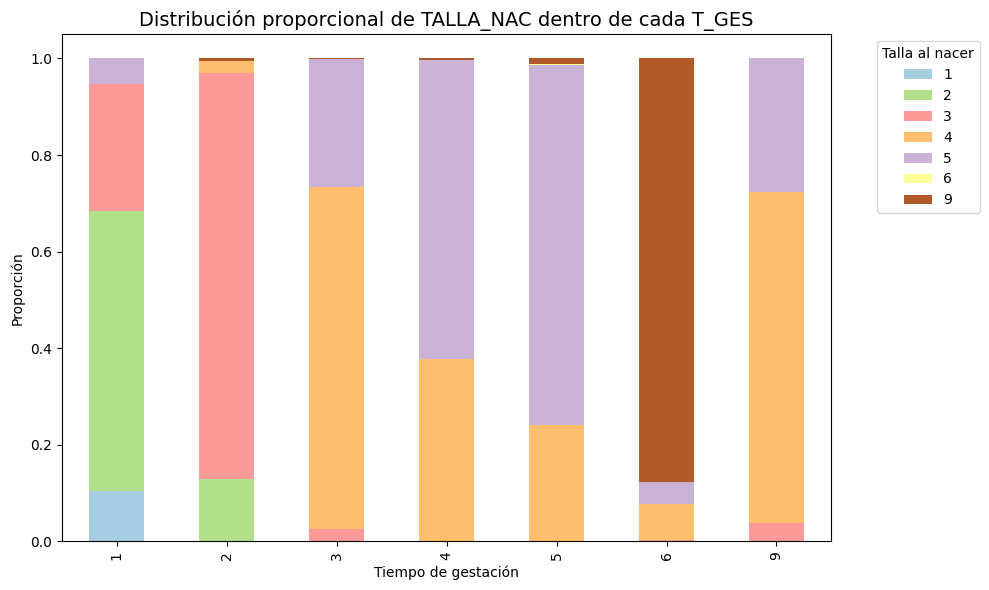

In [59]:
tabla_pct_apilado = tabla_cont.div(tabla_cont.sum(axis=1), axis=0)

ax = tabla_pct_apilado.plot(kind='bar', stacked=True, colormap='Paired', figsize=(10, 6))
ax.set_title('Distribución proporcional de TALLA_NAC dentro de cada T_GES', fontsize=14)
ax.set_xlabel('Tiempo de gestación')
ax.set_ylabel('Proporción')
ax.legend(title='Talla al nacer', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

### Gráfico adicional: Barras apiladas proporcionales (T_GES vs. TALLA_NAC)

En este gráfico, las categorías del eje horizontal (`T_GES`) corresponden a los códigos numéricos originales que representa el DANE:

- 1: Menos de 22 semanas  
- 2: De 22 a 27 semanas  
- 3: De 28 a 37 semanas  
- 4: De 38 a 41 semanas  
- 5: De 42 y más semanas  
- 6: Ignorado  
- 9: Sin información  

Aunque el informe utiliza etiquetas descriptivas en otros gráficos, aquí se usan los códigos numéricos porque son las claves internas en la tabla de contingencia. Es posible renombrar estos índices si se desea mayor claridad visual.

**Interpretación:**  
Se observa que a mayor tiempo de gestación, la proporción de recién nacidos con tallas mayores (como “50-59 cm”) aumenta. Las gestaciones prematuras se asocian con mayor frecuencia a tallas más bajas, lo que es clínicamente esperado.

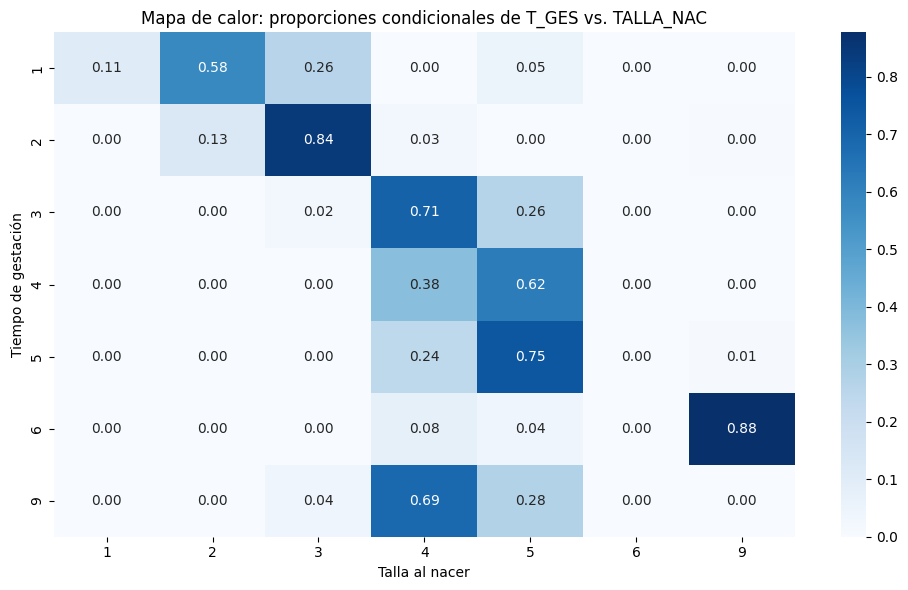

In [53]:
tabla_prop = tabla_cont.div(tabla_cont.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_prop, annot=True, fmt=".2f", cmap="Blues")
plt.title("Mapa de calor: proporciones condicionales de T_GES vs. TALLA_NAC")
plt.xlabel("Talla al nacer")
plt.ylabel("Tiempo de gestación")
plt.tight_layout()
plt.show()

### Gráfico adicional: Mapa de calor de proporciones condicionales

A diferencia del mapa de calor de frecuencias absolutas, este gráfico muestra la proporción de tallas para cada nivel de gestación, facilitando la interpretación de probabilidades condicionales.

**Interpretación:**  
A medida que aumenta el tiempo de gestación, crece la probabilidad de que un recién nacido tenga mayor talla. Las categorías de gestación prematura tienen mayor proporción de tallas bajas.

## Conclusiones

A continuación se responden las tres preguntas planteadas en el enunciado, apoyándonos en los gráficos estadísticos, proporciones, tabla de contingencia, probabilidades condicionales y prueba de Chi-Cuadrado:

1. **¿Cómo se comporta la variable tiempo de gestación (`T_GES`)?**

   La variable `T_GES`, analizada como cualitativa ordinal, muestra que la mayoría de los nacimientos en Colombia durante 2023 ocurrieron entre las 38 y 41 semanas de gestación, lo cual corresponde al embarazo a término. Esta categoría concentra más del 70% de los casos, lo que refleja un patrón esperado en poblaciones saludables. Las categorías asociadas a partos prematuros (menos de 37 semanas) presentan frecuencias considerablemente menores, lo que también es coherente con tendencias clínicas conocidas.

2. **¿Cómo se comporta la variable talla de nacimiento (`TALLA_NAC`)?**

   La distribución de la variable `TALLA_NAC` indica que la mayoría de los recién nacidos se ubican en las categorías de talla entre 50-59 cm y 40-49 cm, con proporciones superiores al 80%. Las tallas extremas (menos de 30 cm o más de 60 cm) son muy poco frecuentes. Estos resultados también coinciden con valores clínicos normales reportados en literatura médica y apoyan la validez de los datos analizados.

3. **¿Alguna variable depende de la otra, o están asociadas? ¿Qué tan asociadas están ambas?**

   A través de la tabla de contingencia y su visualización mediante un mapa de calor, se observan patrones claros de asociación: a mayor tiempo de gestación, tiende a haber mayor talla al nacer. La prueba de Chi-Cuadrado arrojó un valor p menor a 0.00001, lo que permite **rechazar la hipótesis nula de independencia** entre `T_GES` y `TALLA_NAC`, confirmando que **existe una asociación estadísticamente significativa**.

   En cuanto a la magnitud de la asociación, los coeficientes calculados fueron:

   - **Coeficiente de contingencia**: 0.7504 → asociación sustancial  
   - **Coeficiente V de Cramér**: 0.4634 → asociación moderada  
   - **Coeficiente Phi**: 1.1351 → no se interpreta porque la tabla no es 2x2  

   Estos resultados indican que la relación entre el tiempo de gestación y la talla al nacer es **moderada a sustancial**, aunque no necesariamente implica una dependencia fuerte o causalidad directa.

---

## Referencias

[1] Andrés Ríos Gutiérrez. *Estadística descriptiva para datos cualitativos*. YouTube. Disponible en: https://www.youtube.com/watch?v=LGgBU7W9-RQ

[2] DANE (2023). *Estadísticas vitales: nacimientos - Base de datos 2023*. Microdatos DANE. Disponible en: https://microdatos.dane.gov.co/index.php/catalog/732

[3] Agresti, A. (2019). *Statistical Methods for the Social Sciences*. 5ª edición. Pearson Education.

[4] Martínez, A. & Martínez, M. (2008). *Análisis de datos categóricos*. Madrid: Ediciones Díaz de Santos.

[5] McHugh, M. L. (2013). *The Chi-square test of independence*. Biochemia Medica, 23(2), 143–149. https://doi.org/10.11613/BM.2013.018